<a href="https://colab.research.google.com/github/lopespaloma/predicao-avc-projeto-datascience/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

stroke_data_set = pd.read_csv('dados1.csv')

stroke_data_set.shape
stroke_data_set.head(10)

,Genero,Idade,Hipertensao,Doenca Cardiaca,Casado,Tipo de trabalho,Tipo de Residencia,Nivel medio de glicose,IMC,Condicao de fumante,AVC
0,1,67.0,0,1,1,1,0,228.69,36.600000,2,1
1,0,61.0,0,0,1,2,1,202.21,28.893237,0,1
2,1,80.0,0,1,1,1,1,105.92,32.500000,0,1
3,0,49.0,0,0,1,1,0,171.23,34.400000,1,1
4,0,79.0,1,0,1,2,1,174.12,24.000000,0,1
5,1,81.0,0,0,1,1,0,186.21,29.000000,2,1
6,1,74.0,1,1,1,1,1,70.09,27.400000,0,1
7,0,69.0,0,0,0,1,0,94.39,22.800000,0,1
8,0,59.0,0,0,1,1,1,76.15,28.893237,0,1
9,0,78.0,0,0,1,1,0,58.57,24.200000,0,1


In [ ]:
stroke_data_set.describe()

,Idade,Hipertensao,Doenca Cardiaca,Casado,Tipo de trabalho,Tipo de Residencia,Nivel medio de glicose,IMC,Condicao de fumante,AVC
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,0.656164,1.278669,0.491977,106.147677,28.893237,0.500783,0.048728
std,22.612647,0.296607,0.226063,0.475034,0.857785,0.499985,45.283560,7.698018,0.772331,0.215320
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,1.000000,0.000000,91.885000,28.400000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.800000,1.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,97.600000,2.000000,1.000000


In [ ]:
avc_negativo = stroke_data_set.loc[stroke_data_set['AVC'] == 0]

avc_negativo_249 = avc_negativo.sample(n=249)

avc_negativo_249

,Genero,Idade,Hipertensao,Doenca Cardiaca,Casado,Tipo de trabalho,Tipo de Residencia,Nivel medio de glicose,IMC,Condicao de fumante,AVC
4885,1,33.0,0,0,1,1,0,83.12,23.4,0,0
2754,0,56.0,0,0,1,2,0,112.16,25.7,0,0
3856,1,50.0,0,0,1,2,0,101.85,25.1,1,0
3693,1,38.0,0,0,0,1,1,162.72,31.9,1,0
4792,1,9.0,0,0,0,0,0,123.66,17.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3456,0,72.0,1,0,1,1,0,105.51,32.7,0,0
3332,1,27.0,0,0,1,1,0,114.32,28.1,0,0
921,0,16.0,0,0,0,0,1,109.02,19.8,0,0
2207,0,30.0,0,0,1,3,0,83.91,23.9,0,0


In [ ]:
avc_positivo = stroke_data_set.loc[stroke_data_set['AVC'] == 1]

avc_positivo

,Genero,Idade,Hipertensao,Doenca Cardiaca,Casado,Tipo de trabalho,Tipo de Residencia,Nivel medio de glicose,IMC,Condicao de fumante,AVC
0,1,67.0,0,1,1,1,0,228.69,36.600000,2,1
1,0,61.0,0,0,1,2,1,202.21,28.893237,0,1
2,1,80.0,0,1,1,1,1,105.92,32.500000,0,1
3,0,49.0,0,0,1,1,0,171.23,34.400000,1,1
4,0,79.0,1,0,1,2,1,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0,0,1,1,1,84.96,36.700000,0,1
245,0,14.0,0,0,0,0,1,57.93,30.900000,0,1
246,0,75.0,0,0,1,2,1,78.80,29.300000,2,1
247,1,71.0,1,0,1,2,1,87.80,28.893237,0,1


In [ ]:
final_dataset = pd.concat([avc_positivo, avc_negativo_249], ignore_index=True)

final_dataset_shuffle = final_dataset.sample(frac=1).reset_index(drop=True)

final_dataset_shuffle

,Genero,Idade,Hipertensao,Doenca Cardiaca,Casado,Tipo de trabalho,Tipo de Residencia,Nivel medio de glicose,IMC,Condicao de fumante,AVC
0,1,27.0,0,0,1,1,0,114.32,28.100000,0,0
1,0,72.0,0,0,1,1,0,219.91,28.893237,0,1
2,1,79.0,0,1,1,1,1,129.98,22.600000,2,1
3,1,45.0,0,0,1,2,1,75.25,27.600000,1,0
4,1,48.0,0,0,1,1,0,85.54,32.200000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
493,0,69.0,0,0,0,1,0,94.39,22.800000,0,1
494,0,61.0,0,0,1,1,0,97.58,29.700000,2,0
495,0,75.0,0,0,1,1,1,199.20,26.600000,0,1
496,0,81.0,1,0,1,2,1,74.02,25.000000,0,1


In [ ]:
# bibliotecas
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [ ]:
# remover warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# caracteristica e alvo
X = final_dataset_shuffle.drop('AVC', axis=1)
y = final_dataset_shuffle[['AVC']]

In [ ]:
# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# importa a bliblioteca do modelo KNN

from sklearn.neighbors import KNeighborsClassifier
# instanciando o modelo
modeloKNN = KNeighborsClassifier()
# treinando o modelo utilizando o conjunto de treino
modeloKNN.fit(X_train, y_train)
# validando o modelo utilizando o conjunto de teste
precisaoKNN = str(round(modeloKNN.score(X_test, y_test) * 100, 2)) + "%"
# imprimindo o resultado
print("A acurácia do modelo k-NN foi", precisaoKNN)
# predizendo o teste
y_pred = modeloKNN.predict(X_test)
# comparando predição com o real
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

A acurácia do modelo k-NN foi 74.0%
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        73
           1       0.73      0.78      0.75        77

    accuracy                           0.74       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.74      0.74      0.74       150



In [ ]:
#Importa a biblioteca do modelo Naive Bayes Gaussiano

from sklearn.naive_bayes import GaussianNB
# cria um classificador Gaussiano
modeloNB = GaussianNB()
# treinando o modelo usando os ajustes de treinamento
modeloNB.fit(X_train, y_train)
# validando o modelo utilizando o conjunto de teste
precisaoNB = str(round(modeloNB.score(X_test, y_test) * 100, 2))+"%"
# imprimindo o resultado
print("A acurácia do modelo Naive Bayes foi", precisaoNB)
# predizendo o teste
y_pred = modeloNB.predict(X_test)
# comparando predição com o real
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

A acurácia do modelo Naive Bayes foi 70.67%
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        73
           1       0.72      0.70      0.71        77

    accuracy                           0.71       150
   macro avg       0.71      0.71      0.71       150
weighted avg       0.71      0.71      0.71       150



In [ ]:
# normalizando
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X)
X = scaler.transform(X)

scoresKNN = []
scoresNB = []
for i in range(2000):
	X_train, X_test, y_train, y_test = train_test_split(X, y)
	modeloKNN = KNeighborsClassifier()
	modeloKNN.fit(X_train, y_train)
	precisaoKNN = modeloKNN.score(X_test, y_test)
	scoresKNN.append(precisaoKNN)
	modeloNB = GaussianNB()
	modeloNB.fit(X_train, y_train)
	precisaoNB = modeloNB.score(X_test, y_test)
	scoresNB.append(precisaoNB)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ValueError: ignored

In [ ]:
print("Média do Naive Bayes: {:.2f}%".format(np.mean(scoresNB)*100))
print("Desvio padrão do Naive Bayes: {:.2f}%".format(np.std(scoresNB)*100))

Média do Naive Bayes: 71.27%
Desvio padrão do Naive Bayes: 3.77%


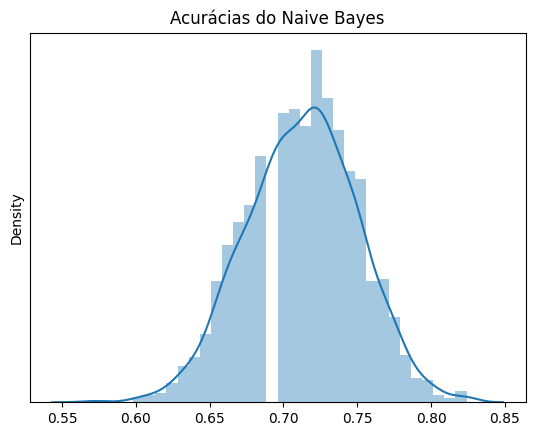

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(scoresNB)
plt.yticks([])
plt.title("Acurácias do Naive Bayes")
plt.show()